In [1]:
import os
import tarfile
from six.moves import urllib

#### Here is the function to fetch the data:

In [2]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

#### Now I will call both functions:
    1) fetch_housing_data: to retrieve all the data needed (only need to be called once)
    2) load_housing_data: to create a DataFrame with all the data downloaded

In [6]:
#fetch_housing_data()

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


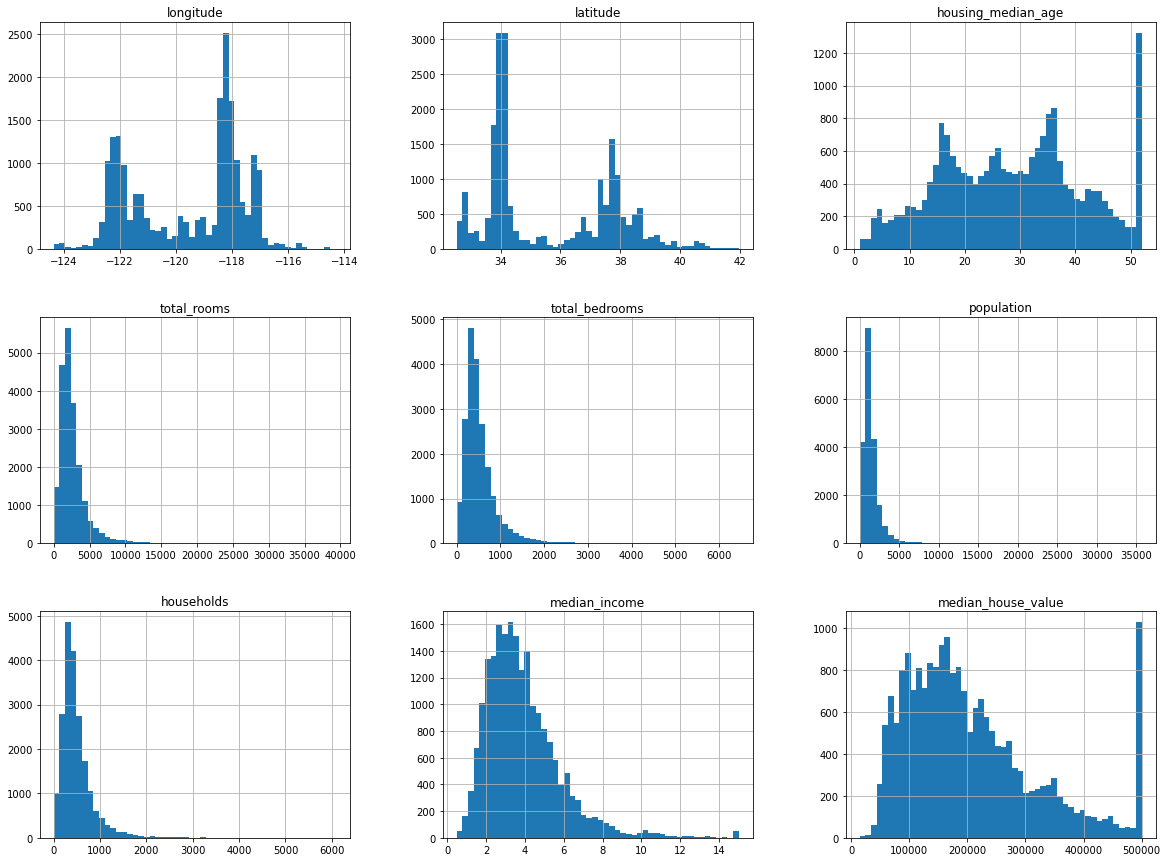

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### Creating a Test Set

In [12]:
import numpy as np

In [13]:
# Create an income category attribute with 5 categories
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

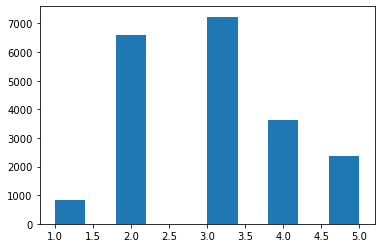

In [14]:
plt.hist(housing['income_cat'])

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [18]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [19]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis= 1, inplace= True)

#### Discover and Visualize the Data to Gain Insights

In [20]:
housing = strat_train_set.copy() # we make a copy to play with the data without harming the training set

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

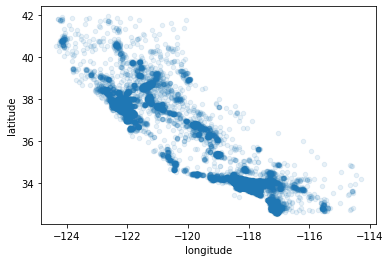

In [21]:
housing.plot(x= 'longitude', y= 'latitude', kind= 'scatter', alpha= .1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

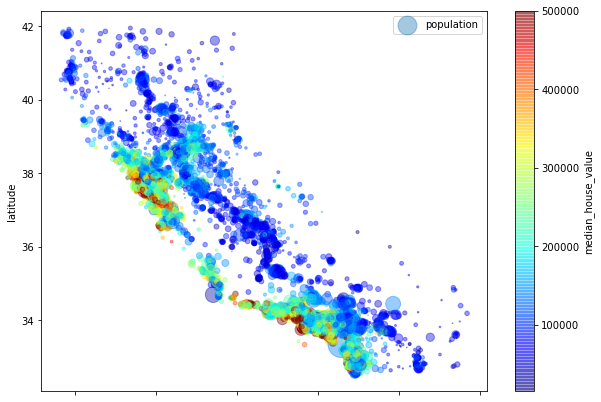

In [22]:
housing.plot(x= 'longitude', y= 'latitude', kind= 'scatter', alpha= .4, s= housing['population']/50, label= 'population', 
             figsize= (10,7), c= 'median_house_value', cmap= plt.get_cmap('jet'), colorbar= True)

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

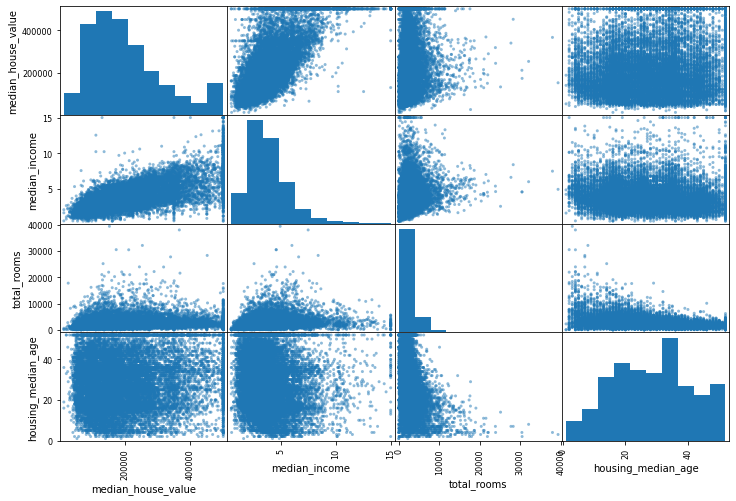

In [25]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

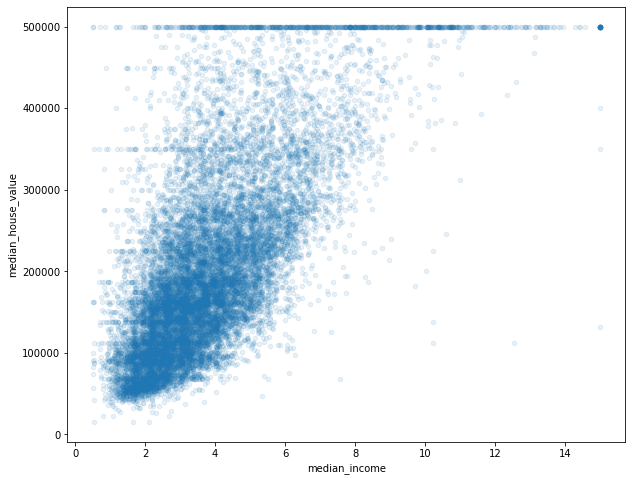

In [26]:
housing.plot(x='median_income', y='median_house_value', kind= 'scatter', alpha= 0.1, figsize=(10,8))

## Experimenting with attribute combinations

In [27]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms

In [30]:
housing = strat_train_set.drop('median_house_value', axis= 1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')

Since the median can only be computed on numerical attributes, we need to creat a copy of the data without the text attribute `ocean_proximity`

In [32]:
housing_num = housing.drop('ocean_proximity', axis= 1)

In [33]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
# This is very well explained on page 62 of the book!
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Handling Text and Categorical Attributes

In [37]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [39]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Custom Transformers
Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes.

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y= None):
        return self
    def transform(self, X, y= None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:,population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

### Transformation Pipelines
Scikit-learn provides the `Pipeline` class to help with all the sequences of transformations made before.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')), # replace the NA values by the median value of the rest
    ('attribs_adder', CombinedAttributesAdder()),   # use the class CombinedAttributesAdder created earlier
    ('std_scaler', StandardScaler())                # uses Standar deviation to get all the attributes to the same scale
])

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)   # it returns the indexes of all the numerical attributes
cat_attribs = ['ocean_proximity'] # index of the categorical attribute

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

### Training and Evaluating on the Training Set

In [46]:
# Using a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [47]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ",list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [48]:
# calculating the RMSE of our linear model
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

68628.19819848923

In [49]:
# using a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [50]:
# calculating the RMSE of our Decision Tree
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

In [51]:
# Better evaluation using 'Cross-Validation'
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [53]:
display_scores(tree_rmse_scores)

Scores:  [68743.69548051 69254.29445287 70258.58346229 68432.44933265
 70856.19624549 75357.96240078 70228.61226578 70128.1696294
 75945.44298322 68865.18252488]
Mean:  70807.05887778684
Standard deviation:  2535.559998849081


In [54]:
# Cross-Validation for the linear model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345084
Standard deviation:  2731.6740017983466


In [55]:
# using RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [56]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

18557.683924519828

In [57]:
# using cross validation to measure the performance of the regressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores =  np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49420.96529327 47660.37331829 49852.35475908 52480.13811951
 49415.96235692 53377.86779145 49017.93241805 47801.37867818
 52805.8151464  50371.53869165]
Mean:  50220.43265728046
Standard deviation:  1924.9996290610918


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring= 'neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [60]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65282.10512570277 {'max_features': 2, 'n_estimators': 3}
55721.97775323989 {'max_features': 2, 'n_estimators': 10}
52480.73112738053 {'max_features': 2, 'n_estimators': 30}
60078.0574133792 {'max_features': 4, 'n_estimators': 3}
52945.55105179348 {'max_features': 4, 'n_estimators': 10}
50383.043741773654 {'max_features': 4, 'n_estimators': 30}
59300.11525570361 {'max_features': 6, 'n_estimators': 3}
52137.39474723938 {'max_features': 6, 'n_estimators': 10}
50137.60050333401 {'max_features': 6, 'n_estimators': 30}
58923.20276884061 {'max_features': 8, 'n_estimators': 3}
51730.30916807763 {'max_features': 8, 'n_estimators': 10}
50265.02037861733 {'max_features': 8, 'n_estimators': 30}
63179.51130309414 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54477.3077367338 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59431.486351399406 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52396.113573497096 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

Since 8 and 30 are the maximum values that were evaluated, you should probably try again with higher values, since the score may continue to improve

In [62]:
param_grid = [
    {'n_estimators': [30, 50, 80], 'max_features': [8, 10, 12, 14]},
    {'bootstrap': [False], 'n_estimators': [30, 50], 'max_features': [8, 10, 12]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring= 'neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 10, 12, 14],
                          'n_estimators': [30, 50, 80]},
                         {'bootstrap': [False], 'max_features': [8, 10, 12],
                          'n_estimators': [30, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 50}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50)

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49795.21268767217 {'max_features': 8, 'n_estimators': 30}
49734.178920087856 {'max_features': 8, 'n_estimators': 50}
49378.931086074095 {'max_features': 8, 'n_estimators': 80}
50210.76149103051 {'max_features': 10, 'n_estimators': 30}
49734.40154583773 {'max_features': 10, 'n_estimators': 50}
49658.56500779313 {'max_features': 10, 'n_estimators': 80}
50168.04884115086 {'max_features': 12, 'n_estimators': 30}
50209.494899964695 {'max_features': 12, 'n_estimators': 50}
49891.460796035346 {'max_features': 12, 'n_estimators': 80}
50551.47874914398 {'max_features': 14, 'n_estimators': 30}
50548.40615190251 {'max_features': 14, 'n_estimators': 50}
50156.41676147547 {'max_features': 14, 'n_estimators': 80}
49323.52923196586 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
49220.12700510303 {'bootstrap': False, 'max_features': 8, 'n_estimators': 50}
49808.38062543706 {'bootstrap': False, 'max_features': 10, 'n_estimators': 30}
49533.51463618545 {'bootstrap': False, 'max_features': 1

### Analyze the Best Models and Their Errors

In [67]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.52899324e-02, 6.43276361e-02, 4.14044144e-02, 1.48149438e-02,
       1.37992408e-02, 1.44856111e-02, 1.37006123e-02, 3.58364632e-01,
       4.88901090e-02, 1.11483559e-01, 6.08688515e-02, 1.03444795e-02,
       1.66122766e-01, 9.66924479e-05, 2.32306255e-03, 3.68345753e-03])

In [68]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3583646323828103, 'median_income'),
 (0.16612276567048706, 'INLAND'),
 (0.11148355852686258, 'pop_per_hhold'),
 (0.07528993243262858, 'longitude'),
 (0.064327636126666, 'latitude'),
 (0.06086885147796286, 'bedrooms_per_room'),
 (0.04889010899896134, 'rooms_per_hhold'),
 (0.04140441442527838, 'housing_median_age'),
 (0.014814943760979206, 'total_rooms'),
 (0.01448561109388694, 'population'),
 (0.013799240787171105, 'total_bedrooms'),
 (0.013700612328077504, 'households'),
 (0.010344479454340744, '<1H OCEAN'),
 (0.003683457531285169, 'NEAR OCEAN'),
 (0.0023230625546655404, 'NEAR BAY'),
 (9.669244793656283e-05, 'ISLAND')]

### Evaluate Your System on the Test Set

In [69]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

46684.27495943134

### Exercises

In [70]:
from sklearn.svm import SVR

Support_reg = SVR(kernel='linear', C=150)
Support_reg.fit(housing_prepared, housing_labels)

SVR(C=150, kernel='linear')

In [71]:
housing_predictions = Support_reg.predict(housing_prepared)
support_rmse = mean_squared_error(housing_labels, housing_predictions)
support_rmse = np.sqrt(support_rmse)
support_rmse

70847.19963246454

In [72]:
# using cross validation to measure the performance of the regressor
support_scores = cross_val_score(Support_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
support_rmse_scores =  np.sqrt(-support_scores)
display_scores(support_rmse_scores)

Scores:  [68167.62598625 68902.99510347 72057.97797589 73975.49501342
 69971.22071929 74276.89949625 67233.46607777 70687.65206276
 73716.78494498 70877.94548619]
Mean:  70986.8062866258
Standard deviation:  2363.6313841451456


In [73]:
Support_reg = SVR(kernel='rbf', C=350, gamma=.05)
Support_reg.fit(housing_prepared, housing_labels)

SVR(C=350, gamma=0.05)

In [74]:
housing_predictions = Support_reg.predict(housing_prepared)
support_rmse = mean_squared_error(housing_labels, housing_predictions)
support_rmse = np.sqrt(support_rmse)
support_rmse

78377.48010400239

In [75]:
# using cross validation to measure the performance of the regressor
support_scores = cross_val_score(Support_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
support_rmse_scores =  np.sqrt(-support_scores)
display_scores(support_rmse_scores)

Scores:  [75896.70024056 78721.25699678 78880.02081765 80924.56192018
 78757.16494511 83779.74032052 76331.87261401 80840.81461197
 82099.5811936  79656.2305272 ]
Mean:  79588.79441875803
Standard deviation:  2311.063448533027


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000224CD3D02C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000224CD3CE9C8>},
                   random_state=42, scoring='neg_mean_squared_error')

In [77]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [78]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [79]:
forest_reg = rnd_search.best_estimator_
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

18045.351455582608

In [80]:
# using cross validation to measure the performance of the regressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores =  np.sqrt(-support_scores)
display_scores(forest_rmse_scores)

Scores:  [75896.70024056 78721.25699678 78880.02081765 80924.56192018
 78757.16494511 83779.74032052 76331.87261401 80840.81461197
 82099.5811936  79656.2305272 ]
Mean:  79588.79441875803
Standard deviation:  2311.063448533027
